In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import parser

In [81]:
filename = '/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2020_Q1.csv','/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2019_Q2.csv','/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2019_Q3.csv','/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2019_Q4.csv'

In [82]:
q2_2019 = pd.read_csv('/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2019_Q2.csv')
q3_2019 = pd.read_csv('/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2019_Q3.csv')
q4_2019 = pd.read_csv('/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2019_Q4.csv')
q1_2020 = pd.read_csv('/Users/mela/Projects/Data/Divvy_Exercise/Divvy_Trips_2020_Q1.csv')

In [83]:
column_names_q2_2019 = q2_2019.columns
column_names_q3_2019 = q3_2019.columns
column_names_q4_2019 = q4_2019.columns
column_names_q1_2020 = q1_2020.columns


In [84]:
q2_2019 = q2_2019.rename(columns=dict(zip(column_names_q2_2019, column_names_q1_2020)))
q3_2019 = q3_2019.rename(columns=dict(zip(column_names_q3_2019, column_names_q1_2020)))
q4_2019 = q4_2019.rename(columns=dict(zip(column_names_q4_2019, column_names_q1_2020)))


In [85]:
# Check the shape of the dataframes
print("Shape of q2_2019:", q2_2019.shape)
print("Shape of q3_2019:", q3_2019.shape)
print("Shape of q4_2019:", q4_2019.shape)
print("Shape of q1_2020:", q1_2020.shape)

# Check the first few rows of the dataframes
print("First few rows of q2_2019:")
print(q2_2019.head())

print("First few rows of q3_2019:")
print(q3_2019.head())

print("First few rows of q4_2019:")
print(q4_2019.head())

print("First few rows of q1_2020:")
print(q1_2020.head())

# Check for missing values
print("Missing values in q2_2019:")
print(q2_2019.isnull().sum())

print("Missing values in q3_2019:")
print(q3_2019.isnull().sum())

print("Missing values in q4_2019:")
print(q4_2019.isnull().sum())

print("Missing values in q1_2020:")
print(q1_2020.isnull().sum())

# Check data types of columns
print("Data types of columns in q2_2019:")
print(q2_2019.dtypes)

print("Data types of columns in q3_2019:")
print(q3_2019.dtypes)

print("Data types of columns in q4_2019:")
print(q4_2019.dtypes)

print("Data types of columns in q1_2020:")
print(q1_2020.dtypes)



Shape of q2_2019: (1108163, 12)
Shape of q3_2019: (1640718, 12)
Shape of q4_2019: (704054, 12)
Shape of q1_2020: (426887, 13)
First few rows of q2_2019:
    ride_id        rideable_type           started_at  ended_at  \
0  22178529  2019-04-01 00:02:22  2019-04-01 00:09:48      6251   
1  22178530  2019-04-01 00:03:02  2019-04-01 00:20:30      6226   
2  22178531  2019-04-01 00:11:07  2019-04-01 00:15:19      5649   
3  22178532  2019-04-01 00:13:01  2019-04-01 00:18:58      4151   
4  22178533  2019-04-01 00:19:26  2019-04-01 00:36:13      3270   

  start_station_name  start_station_id           end_station_name  \
0              446.0                81         Daley Center Plaza   
1            1,048.0               317        Wood St & Taylor St   
2              252.0               283  LaSalle St & Jackson Blvd   
3              357.0                26   McClurg Ct & Illinois St   
4            1,007.0               202       Halsted St & 18th St   

   end_station_id            

In [86]:
q2_2019['ride_id'] = q2_2019['ride_id'].astype(str)
q2_2019['rideable_type'] = q2_2019['rideable_type'].astype(str)

q3_2019['ride_id'] = q3_2019['ride_id'].astype(str)
q3_2019['rideable_type'] = q3_2019['rideable_type'].astype(str)

q4_2019['ride_id'] = q4_2019['ride_id'].astype(str)
q4_2019['rideable_type'] = q4_2019['rideable_type'].astype(str)

q1_2020['ride_id'] = q1_2020['ride_id'].astype(str)
q1_2020['rideable_type'] = q1_2020['rideable_type'].astype(str)


In [87]:
# Stack individual quarter's data frames into one big data frame
big_df = pd.concat([q2_2019, q3_2019, q4_2019, q1_2020], ignore_index=True)

# Print the shape of the big data frame
print("Shape of the big data frame:", big_df.shape)


Shape of the big data frame: (3879822, 13)


In [88]:
column_names = big_df.columns

In [89]:
num_rows = big_df.shape[0]
print("Number of rows in the dataframe:", num_rows)


Number of rows in the dataframe: 3879822


In [90]:
num_rows, num_columns = big_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 3879822
Number of columns: 13


In [91]:
column_data_types = big_df.dtypes
print(column_data_types)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat              object
start_lng              object
end_lat                object
end_lng               float64
member_casual          object
dtype: object


In [92]:
numeric_columns = big_df.select_dtypes(include=np.number).columns
numeric_summary = big_df[numeric_columns].describe()
print(numeric_summary)


       start_station_id  end_station_id       end_lng
count      3.879822e+06    3.879821e+06  3.359093e+06
mean       2.028972e+02    2.037552e+02  1.721041e+03
std        1.571361e+02    1.571912e+02  6.901889e+02
min        1.000000e+00    1.000000e+00 -8.777470e+01
25%        7.700000e+01    7.700000e+01  1.971000e+03
50%        1.740000e+02    1.740000e+02  1.986000e+03
75%        2.910000e+02    2.910000e+02  1.992000e+03
max        6.750000e+02    6.750000e+02  2.014000e+03


In [93]:
big_df['member_casual'] = big_df['member_casual'].replace({'member': 'Subscriber', 'Customer': 'casual'})


In [94]:
import pandas as pd

# Assuming 'all_trips' is your DataFrame and 'started_at' is the column with datetime information
# First, ensure 'started_at' is a datetime column
big_df['started_at'] = pd.to_datetime(big_df['started_at'])

# Now create new columns for day, month, and year
big_df = big_df.assign(
    day=big_df['started_at'].dt.day,
    month=big_df['started_at'].dt.month,
    year=big_df['started_at'].dt.year
)


In [95]:
# Assuming 'all_trips' is your DataFrame and it has 'ended_at' and 'started_at' as datetime columns
# First, ensure that 'ended_at' and 'started_at' are in datetime format
big_df['ended_at'] = pd.to_datetime(big_df['ended_at'])
big_df['started_at'] = pd.to_datetime(big_df['started_at'])

# Calculate the ride length in minutes and create a new column
big_df['ride_length'] = (big_df['ended_at'] - big_df['started_at']).dt.total_seconds() / 60


In [96]:
big_df = big_df[big_df['ride_length'] >= 0]


In [97]:
big_df.loc[:, 'member_casual'] = big_df['member_casual'].replace({'Subscriber': 'member', 'Customer': 'casual'})

In [98]:
big_df['member_casual']

3452935    member
3452936    member
3452937    member
3452938    member
3452939    member
            ...  
3879817    casual
3879818    member
3879819    casual
3879820    member
3879821    casual
Name: member_casual, Length: 426770, dtype: object

In [99]:
big_df.loc[:, 'member_casual'] = big_df.loc[:, 'member_casual'].replace({
    'Subscriber': 'member',
    'Customer': 'casual'
})


In [100]:
big_df['member_casual']

3452935    member
3452936    member
3452937    member
3452938    member
3452939    member
            ...  
3879817    casual
3879818    member
3879819    casual
3879820    member
3879821    casual
Name: member_casual, Length: 426770, dtype: object

In [101]:

# Convert 'started_at' to datetime if it's not already
big_df.loc[:, 'started_at'] = pd.to_datetime(big_df['started_at'])

# Extract date components and create new columns
big_df.loc[:, 'date'] =  big_df['started_at'].dt.date
big_df.loc[:, 'month'] = big_df['started_at'].dt.strftime('%m')
big_df.loc[:, 'day'] = big_df['started_at'].dt.strftime('%d')
big_df.loc[:, 'year'] = big_df['started_at'].dt.strftime('%Y')
big_df.loc[:, 'day_of_week'] = big_df['started_at'].dt.strftime('%A')


In [102]:
# Convert 'ended_at' and 'started_at' to datetime if they're not already
big_df.loc[:, 'ended_at'] = pd.to_datetime(big_df['ended_at'])
big_df.loc[:, 'started_at'] = pd.to_datetime(big_df['started_at'])

# Calculate the ride length in seconds and create a new column
big_df.loc[:, 'ride_length'] = (big_df['ended_at'] - big_df['started_at']).dt.total_seconds()

In [103]:
str(big_df)

'                  ride_id rideable_type          started_at  \\\n3452935  EACB19130B0CDA4A   docked_bike 2020-01-21 20:06:59   \n3452936  8FED874C809DC021   docked_bike 2020-01-30 14:22:39   \n3452937  789F3C21E472CA96   docked_bike 2020-01-09 19:29:26   \n3452938  C9A388DAC6ABF313   docked_bike 2020-01-06 16:17:07   \n3452939  943BC3CBECCFD662   docked_bike 2020-01-30 08:37:16   \n...                   ...           ...                 ...   \n3879817  ADDAA33CEBCAE733   docked_bike 2020-03-10 10:40:06   \n3879818  82B10FA3994BC66A   docked_bike 2020-03-07 15:25:55   \n3879819  AA0D5AAA0B59C8AA   docked_bike 2020-03-01 13:12:38   \n3879820  3296360A7BC20FB8   docked_bike 2020-03-07 18:02:45   \n3879821  064EC7698E4FF9B3   docked_bike 2020-03-08 13:03:57   \n\n                   ended_at         start_station_name  start_station_id  \\\n3452935 2020-01-21 20:14:30   Western Ave & Leland Ave               239   \n3452936 2020-01-30 14:26:22    Clark St & Montrose Ave               234 

In [104]:
# Convert 'ride_length' to a numeric type, assuming it's a string representation of numbers
big_df.loc[:, 'ride_length'] = pd.to_numeric(big_df['ride_length'], errors='coerce')

# Check if 'ride_length' is numeric
is_numeric = pd.api.types.is_numeric_dtype(big_df['ride_length'])
print(is_numeric)  # This will print True if 'ride_length' is numeric


True


In [105]:
# Assuming 'all_trips' is a pandas DataFrame
big_df_v2 = big_df[(big_df['start_station_name'] != "HQ QR") & (big_df['ride_length'] >= 0)]


In [106]:
# Calculate mean of ride_length
mean_ride_length = big_df_v2['ride_length'].mean()

# Calculate median of ride_length
median_ride_length = big_df_v2['ride_length'].median()

# Calculate maximum of ride_length
max_ride_length = big_df_v2['ride_length'].max()

# Calculate minimum of ride_length
min_ride_length = big_df_v2['ride_length'].min()

# You can print these values if you want to see them
print(f"Mean: {mean_ride_length}")
print(f"Median: {median_ride_length}")
print(f"Max: {max_ride_length}")
print(f"Min: {min_ride_length}")


Mean: 1338.6965139913027
Median: 555.0
Max: 9387024.0
Min: 1.0


In [107]:
ride_length_summary = big_df_v2['ride_length'].describe()

print(ride_length_summary)


count    4.231200e+05
mean     1.338697e+03
std      3.730725e+04
min      1.000000e+00
25%      3.340000e+02
50%      5.550000e+02
75%      9.550000e+02
max      9.387024e+06
Name: ride_length, dtype: float64


In [108]:
# Group by 'member_casual' and then calculate the mean of 'ride_length'
ride_length_means = big_df_v2.groupby('member_casual')['ride_length'].mean().reset_index()

print(ride_length_means)


  member_casual  ride_length
0        casual  6230.773360
1        member   760.628714


In [109]:
ride_length_medians = big_df_v2.groupby('member_casual')['ride_length'].median().reset_index()

print(ride_length_medians)

  member_casual  ride_length
0        casual       1389.0
1        member        515.0


In [110]:
ride_length_max = big_df_v2.groupby('member_casual')['ride_length'].max().reset_index()

print(ride_length_max)

  member_casual  ride_length
0        casual    9387024.0
1        member    5627611.0


In [111]:
ride_length_min= big_df_v2.groupby('member_casual')['ride_length'].min().reset_index()

print(ride_length_min)

  member_casual  ride_length
0        casual          2.0
1        member          1.0


In [112]:
# Group by both 'member_casual' and 'day_of_week', then calculate the mean of 'ride_length'
grouped_means = big_df_v2.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

print(grouped_means)



   member_casual day_of_week  ride_length
0         casual      Friday  7907.888314
1         casual      Monday  5818.343877
2         casual    Saturday  6017.156016
3         casual      Sunday  5710.566505
4         casual    Thursday  8744.657440
5         casual     Tuesday  5832.359372
6         casual   Wednesday  5132.622573
7         member      Friday   757.324131
8         member      Monday   778.628587
9         member    Saturday   929.989237
10        member      Sunday   949.340146
11        member    Thursday   693.232541
12        member     Tuesday   692.032297
13        member   Wednesday   699.547087


In [113]:

# Assuming 'all_trips_v2' is a pandas DataFrame
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Convert 'day_of_week' to a categorical type with the specified order
big_df_v2.loc[:, 'day_of_week'] = pd.Categorical(big_df_v2['day_of_week'], categories=days_order, ordered=True)

In [114]:
# Group by 'member_casual' and 'day_of_week', then calculate the mean of 'ride_length'
mean_ride_length = big_df_v2.groupby(['member_casual', 'day_of_week'])['ride_length'].mean().reset_index()

print(mean_ride_length)


   member_casual day_of_week  ride_length
0         casual      Friday  7907.888314
1         casual      Monday  5818.343877
2         casual    Saturday  6017.156016
3         casual      Sunday  5710.566505
4         casual    Thursday  8744.657440
5         casual     Tuesday  5832.359372
6         casual   Wednesday  5132.622573
7         member      Friday   757.324131
8         member      Monday   778.628587
9         member    Saturday   929.989237
10        member      Sunday   949.340146
11        member    Thursday   693.232541
12        member     Tuesday   692.032297
13        member   Wednesday   699.547087


In [115]:
# 1. Add a 'weekday' column with weekday names
big_df_v2['weekday'] = big_df_v2['started_at'].dt.day_name()

# 2. Group by 'member_casual' and 'weekday'
# 3. Summarize data: count rides and calculate average ride length
summary = big_df_v2.groupby(['member_casual', 'weekday']).agg(
    number_of_rides=pd.NamedAgg(column='ride_length', aggfunc='size'),
    average_duration=pd.NamedAgg(column='ride_length', aggfunc='mean')
).reset_index()

# 4. Sort the DataFrame by 'member_casual' and 'weekday' (assuming weekday is sorted by name, not by actual order of days)
# If you need to sort by the actual order of days, you would first need to map 'weekday' to an ordered categorical
ordered_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
summary['weekday'] = pd.Categorical(summary['weekday'], categories=ordered_weekdays, ordered=True)

sorted_summary = summary.sort_values(by=['member_casual', 'weekday'])

print(sorted_summary)


   member_casual    weekday  number_of_rides  average_duration
1         casual     Monday             3699       5818.343877
5         casual    Tuesday             4583       5832.359372
6         casual  Wednesday             5201       5132.622573
4         casual   Thursday             4227       8744.657440
0         casual     Friday             4638       7907.888314
2         casual   Saturday             7480       6017.156016
3         casual     Sunday            14886       5710.566505
8         member     Monday            61923        778.628587
12        member    Tuesday            69697        692.032297
13        member  Wednesday            63977        699.547087
11        member   Thursday            61245        693.232541
7         member     Friday            55496        757.324131
9         member   Saturday            30104        929.989237
10        member     Sunday            35964        949.340146


/var/folders/4m/q6fzllfn4xg4_dc9s1tjcd_m0000gn/T/ipykernel_6248/2356084739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df_v2['weekday'] = big_df_v2['started_at'].dt.day_name()


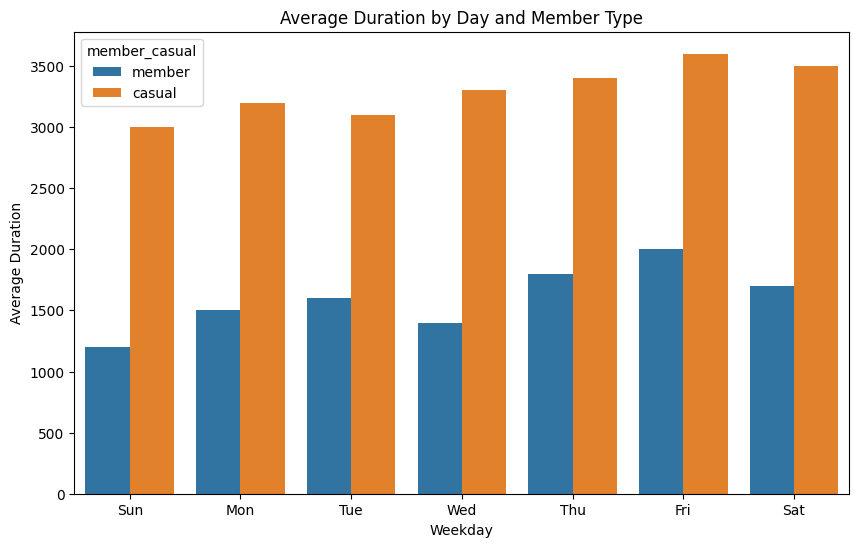

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'weekday': ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'] * 2,
    'average_duration': [1200, 1500, 1600, 1400, 1800, 2000, 1700, 3000, 3200, 3100, 3300, 3400, 3600, 3500],
    'member_casual': ['member'] * 7 + ['casual'] * 7
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='average_duration', hue='member_casual', data=df)

# Customize the plot
plt.title('Average Duration by Day and Member Type')
plt.xlabel('Weekday')
plt.ylabel('Average Duration')

# Show the plot
plt.show()
